In [ ]:
# Install pingouin
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from pingouin import ancova
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import FTestAnovaPower
import statsmodels.stats.power as smp
import seaborn as sns
%matplotlib inline
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read file
datafile = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
url = datafile.replace(" ", "%20")
data = pd.read_csv(url)

In [ ]:
# Check the NA values in each column
data.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
# Drop NA for race_column as it only contains 4
race_data = data.dropna(subset=['Perceived_Race'])

In [ ]:
# Drop all search reason columns and items found as it wont be applied to reaseach questions
race_data = race_data.drop(columns=['SearchReason_CauseInjury', 
                                    'SearchReason_AssistEscape',
                                    'SearchReason_PossessWeapons', 
                                    'SearchReason_PossessEvidence', 
                                    'ItemsFound'])
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [ ]:
# Drop all ID columns and it cannot be used for reaseaching
race_data = race_data.drop(columns=['EventID', 
                                    'ArrestID',
                                    'PersonID', 
                                    'ObjectId'])
race_data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,Oct-Dec,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,Jan-Mar,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,Jan-Mar,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Value counts for each column to see if there is unknown in words
for c in race_data.columns:
    print ("---- %s ---" % c)
    print (race_data[c].value_counts())

---- Arrest_Year ---
2021    33295
2020    31977
Name: Arrest_Year, dtype: int64
---- Arrest_Month ---
Jan-Mar      17612
July-Sept    16770
Oct-Dec      15705
Apr-June     15185
Name: Arrest_Month, dtype: int64
---- Perceived_Race ---
White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64
---- Sex ---
M    52647
F    12616
U        9
Name: Sex, dtype: int64
---- Age_group__at_arrest_ ---
Aged 25 to 34 years          20948
Aged 35 to 44 years          16241
Aged 18 to 24 years          10040
Aged 45 to 54 years           9065
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64
---- Youth_at_arrest__under_18_

In [ ]:
# Frequency Table for stripsearch based on race
race_data[['StripSearch','Perceived_Race']].groupby('Perceived_Race').describe()

StripSearch                                             
                           count      mean       std  min  25%  50%  75%  max
Perceived_Race                                                               
Black                    17526.0  0.138879  0.345830  0.0  0.0  0.0  0.0  1.0
East/Southeast Asian      4415.0  0.077237  0.266997  0.0  0.0  0.0  0.0  1.0
Indigenous                1934.0  0.158221  0.365043  0.0  0.0  0.0  0.0  1.0
Latino                    1768.0  0.074661  0.262917  0.0  0.0  0.0  0.0  1.0
Middle-Eastern            3237.0  0.070436  0.255919  0.0  0.0  0.0  0.0  1.0
South Asian               3613.0  0.071132  0.257081  0.0  0.0  0.0  0.0  1.0
Unknown or Legacy         5056.0  0.106013  0.307884  0.0  0.0  0.0  0.0  1.0
White                    27723.0  0.128630  0.334796  0.0  0.0  0.0  0.0  1.0

In [ ]:
# Since Unisex in only 9 samples and it is too small sample size to work with, drop Unisex
race_data = (race_data[race_data['Sex'].str.contains('U') == False])

In [ ]:
# Descriptive Statistics for stripsearch based on sex
race_data[['StripSearch','Sex']].groupby('Sex').describe()

StripSearch                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
F       12616.0  0.101696  0.302260  0.0  0.0  0.0  0.0  1.0
M       52647.0  0.123787  0.329341  0.0  0.0  0.0  0.0  1.0

In [ ]:
# Drop NA for Age_group__at_arrest_ column
race_data = race_data.dropna(subset=['Age_group__at_arrest_'])

In [ ]:
# Descriptive Statistics for stripsearch based on sex
race_data[['StripSearch','Age_group__at_arrest_']].groupby('Age_group__at_arrest_').describe()

StripSearch                                          \
                                count      mean       std  min  25%  50%  75%   
Age_group__at_arrest_                                                           
Aged 17 years and under        1361.0  0.006613  0.081080  0.0  0.0  0.0  0.0   
Aged 17 years and younger      1681.0  0.161214  0.367837  0.0  0.0  0.0  0.0   
Aged 18 to 24 years           10038.0  0.134389  0.341087  0.0  0.0  0.0  0.0   
Aged 25 to 34 years           20944.0  0.132305  0.338830  0.0  0.0  0.0  0.0   
Aged 35 to 44 years           16240.0  0.129126  0.335349  0.0  0.0  0.0  0.0   
Aged 45 to 54 years            9065.0  0.099835  0.299796  0.0  0.0  0.0  0.0   
Aged 55 to 64 years            4588.0  0.078901  0.269614  0.0  0.0  0.0  0.0   
Aged 65 and older               624.0  0.049679  0.217456  0.0  0.0  0.0  0.0   
Aged 65 years and older         698.0  0.007163  0.084393  0.0  0.0  0.0  0.0   

                                
                           max  
Age_group__at_arrest_           
Aged 17 years and under    1.0  
Aged 17 years and younger  1.0  
Aged 18 to 24 years        1.0  
Aged 25 to 34 years        1.0  
Aged 35 to 44 years        1.0  
Aged 45 to 54 years        1.0  
Aged 55 to 64 years        1.0  
Aged 65 and older          1.0  
Aged 65 years and older    1.0

In [ ]:
# Descriptive statistics based on different youth group
race_data[['StripSearch','Youth_at_arrest__under_18_years']].groupby('Youth_at_arrest__under_18_years').describe()

StripSearch                                \
                                      count      mean       std  min  25%   
Youth_at_arrest__under_18_years                                             
Not a youth                         62197.0  0.120906  0.326021  0.0  0.0   
Youth (aged 17 and younger)          1681.0  0.161214  0.367837  0.0  0.0   
Youth (aged 17 years and under)      1361.0  0.006613  0.081080  0.0  0.0   

                                                
                                 50%  75%  max  
Youth_at_arrest__under_18_years                 
Not a youth                      0.0  0.0  1.0  
Youth (aged 17 and younger)      0.0  0.0  1.0  
Youth (aged 17 years and under)  0.0  0.0  1.0

In [ ]:
# Copy of the dataset with cleanning procedure to divide sub-dataset
race_copy = race_data.copy(deep=True)
race_copy.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,Oct-Dec,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,Jan-Mar,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,Jan-Mar,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Mutate month column from text based with string type categorical number
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['Jan-Mar'], '1')
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['Apr-June'], '2')
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['July-Sept'], '3')
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['Oct-Dec'], '4')
race_data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,3,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,3,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,4,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,1,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,1,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Mutate race column from text based with string type categorical number
# Based on highest from lowest frequency
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['White'], '1')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Black'], '2')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Unknown or Legacy'], '3')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['East/Southeast Asian'], '4')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['South Asian'], '5')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Middle-Eastern'], '6')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Indigenous'], '7')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Latino'], '8')
race_data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,3,1,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,3,1,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,4,3,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,1,2,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,1,5,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Mutate sex from text based with string type numerical categorical number
race_data['Sex'] = race_data['Sex'].replace(['M'], '1')
race_data['Sex'] = race_data['Sex'].replace(['F'], '2')
race_data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,3,1,1,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,3,1,1,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,4,3,1,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,1,2,1,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,1,5,1,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Mutate age group from text to string type numerical categorical number
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 17 years and under'], '1')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 17 years and younger'], '1')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 18 to 24 years'], '2')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 25 to 34 years'], '3')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 35 to 44 years'], '4')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 45 to 54 years'], '5')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 55 to 64 years'], '6')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 65 and older'], '7')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 65 years and older'], '7')
race_data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,3,1,1,4,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,3,1,1,4,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,4,3,1,4,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,1,2,1,3,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,1,5,1,3,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Mutate Youth_at_arrest__under_18_year
race_data['Youth_at_arrest__under_18_years'] = race_data[
    'Youth_at_arrest__under_18_years'].replace(['Not a youth'], '1')
race_data['Youth_at_arrest__under_18_years'] = race_data[
    'Youth_at_arrest__under_18_years'].replace(
        ['Youth (aged 17 and younger)'], '2')
race_data['Youth_at_arrest__under_18_years'] = race_data[
    'Youth_at_arrest__under_18_years'].replace(
        ['Youth (aged 17 years and under)'], '2')
race_data.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,3,1,1,4,1,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,3,1,1,4,1,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,4,3,1,4,1,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,1,2,1,3,1,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,1,5,1,3,1,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
# Covert string into integer for all mutate columns
race_data.Arrest_Month = race_data.Arrest_Month.astype('int64')
race_data.Perceived_Race = race_data.Perceived_Race.astype('int64')
race_data.Sex = race_data.Sex.astype('int64')
race_data.Age_group__at_arrest_ = race_data.Age_group__at_arrest_.astype('int64')
race_data.Youth_at_arrest__under_18_years = race_data.Youth_at_arrest__under_18_years.astype('int64')

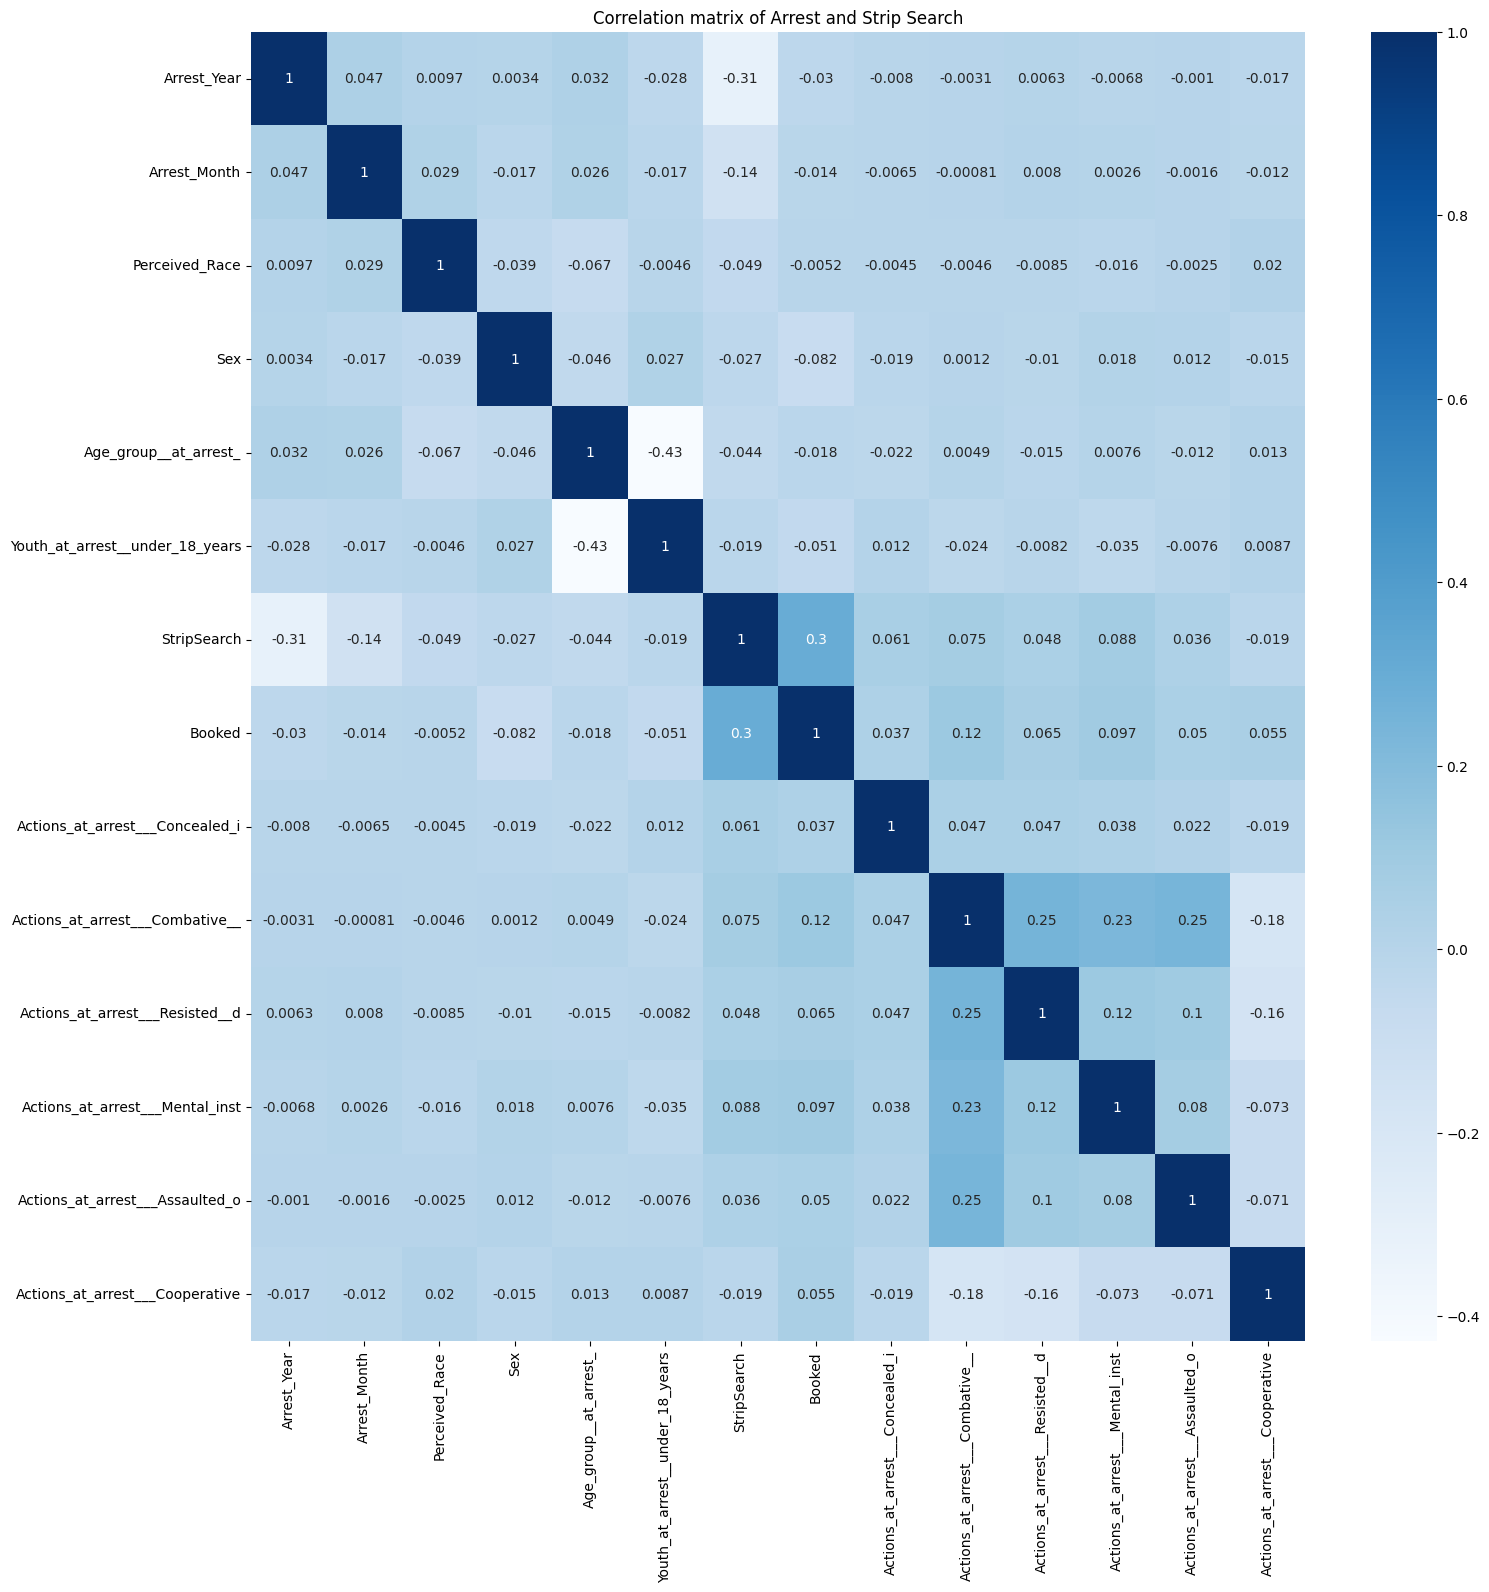

In [ ]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(17, 17))
plt.title("Correlation matrix of Arrest and Strip Search")
corr = race_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [ ]:
# Research question part 1
# Pick out columns which will needed for next step research after data cleanning procedure
subset_data1= race_copy[['Arrest_Year', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Actions_at_arrest___Cooperative', 'StripSearch']]
subset_data1.head()

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,StripSearch
0,2020,White,M,Aged 35 to 44 years,1,0
1,2020,White,M,Aged 35 to 44 years,0,0
2,2020,Unknown or Legacy,M,Aged 35 to 44 years,0,0
3,2021,Black,M,Aged 25 to 34 years,0,0
4,2021,South Asian,M,Aged 25 to 34 years,0,0


In [ ]:
# Replace similar description into same senetences
subset_data1['Age_group__at_arrest_'] = subset_data1[
    'Age_group__at_arrest_'].replace(['Aged 17 years and under'], 'Aged 17 years and younger')
subset_data1['Age_group__at_arrest_'] = subset_data1[
    'Age_group__at_arrest_'].replace(['Aged 65 years and older'], 'Aged 65 and older')
subset_data1.head()

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,StripSearch
0,2020,White,M,Aged 35 to 44 years,1,0
1,2020,White,M,Aged 35 to 44 years,0,0
2,2020,Unknown or Legacy,M,Aged 35 to 44 years,0,0
3,2021,Black,M,Aged 25 to 34 years,0,0
4,2021,South Asian,M,Aged 25 to 34 years,0,0


In [ ]:
# Count the number of people who are cooperative
count_data1 = subset_data1[
    subset_data1['Actions_at_arrest___Cooperative']==1].groupby(['Arrest_Year', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'],as_index=False).size()
count_data1.rename(columns={'size':'Cooperative_counts'}, inplace=True)
count_data1['Cooperative_counts'] = count_data1['Cooperative_counts']
count_data1.head()

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,Cooperative_counts
0,2020,Black,F,Aged 17 years and younger,87
1,2020,Black,F,Aged 18 to 24 years,145
2,2020,Black,F,Aged 25 to 34 years,178
3,2020,Black,F,Aged 35 to 44 years,112
4,2020,Black,F,Aged 45 to 54 years,59


In [ ]:
# Count the number of people who are being strip searched
count_data2 = subset_data1[
    subset_data1['StripSearch']==1].groupby(['Arrest_Year', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'],as_index=False).size()
count_data2.rename(columns={'size':'StripSearch_counts'}, inplace=True)
count_data2['StripSearch_counts'] = count_data2['StripSearch_counts']
count_data2.head()

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch_counts
0,2020,Black,F,Aged 17 years and younger,11
1,2020,Black,F,Aged 18 to 24 years,78
2,2020,Black,F,Aged 25 to 34 years,79
3,2020,Black,F,Aged 35 to 44 years,41
4,2020,Black,F,Aged 45 to 54 years,28


In [ ]:
# Merge 2 tables together
data1 = pd.merge(count_data1, count_data2, how="left")
data1.head()

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,Cooperative_counts,StripSearch_counts
0,2020,Black,F,Aged 17 years and younger,87,11.0
1,2020,Black,F,Aged 18 to 24 years,145,78.0
2,2020,Black,F,Aged 25 to 34 years,178,79.0
3,2020,Black,F,Aged 35 to 44 years,112,41.0
4,2020,Black,F,Aged 45 to 54 years,59,28.0


In [ ]:
# Replace Null with value of 0 
# Finalized data 1 for research question 1
data1['StripSearch_counts'].fillna(0, inplace = True)
data1.head(10)

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,Cooperative_counts,StripSearch_counts
0,2020,Black,F,Aged 17 years and younger,87,11.0
1,2020,Black,F,Aged 18 to 24 years,145,78.0
2,2020,Black,F,Aged 25 to 34 years,178,79.0
3,2020,Black,F,Aged 35 to 44 years,112,41.0
4,2020,Black,F,Aged 45 to 54 years,59,28.0
5,2020,Black,F,Aged 55 to 64 years,16,2.0
6,2020,Black,F,Aged 65 and older,5,0.0
7,2020,Black,M,Aged 17 years and younger,229,136.0
8,2020,Black,M,Aged 18 to 24 years,731,518.0
9,2020,Black,M,Aged 25 to 34 years,1119,728.0


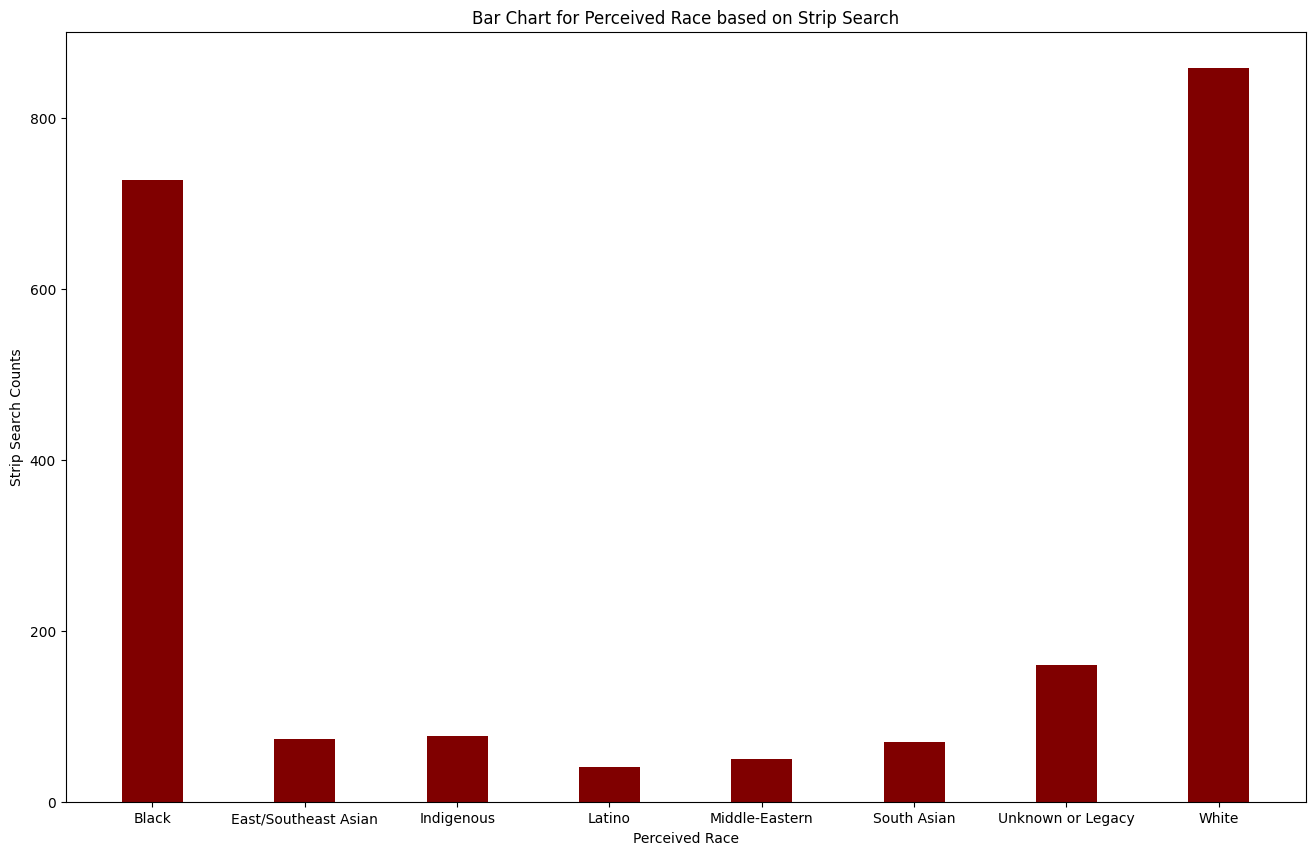

In [ ]:
# EDA
# Bar chart for race and strip search
fig = plt.figure(figsize = (16, 10))
# set up title and label
plt.bar(data1['Perceived_Race'], data1['StripSearch_counts'], 
        color ='maroon',
        width = 0.4)
plt.xlabel("Perceived Race")
plt.ylabel("Strip Search Counts")
plt.title("Bar Chart for Perceived Race based on Strip Search")
plt.show()

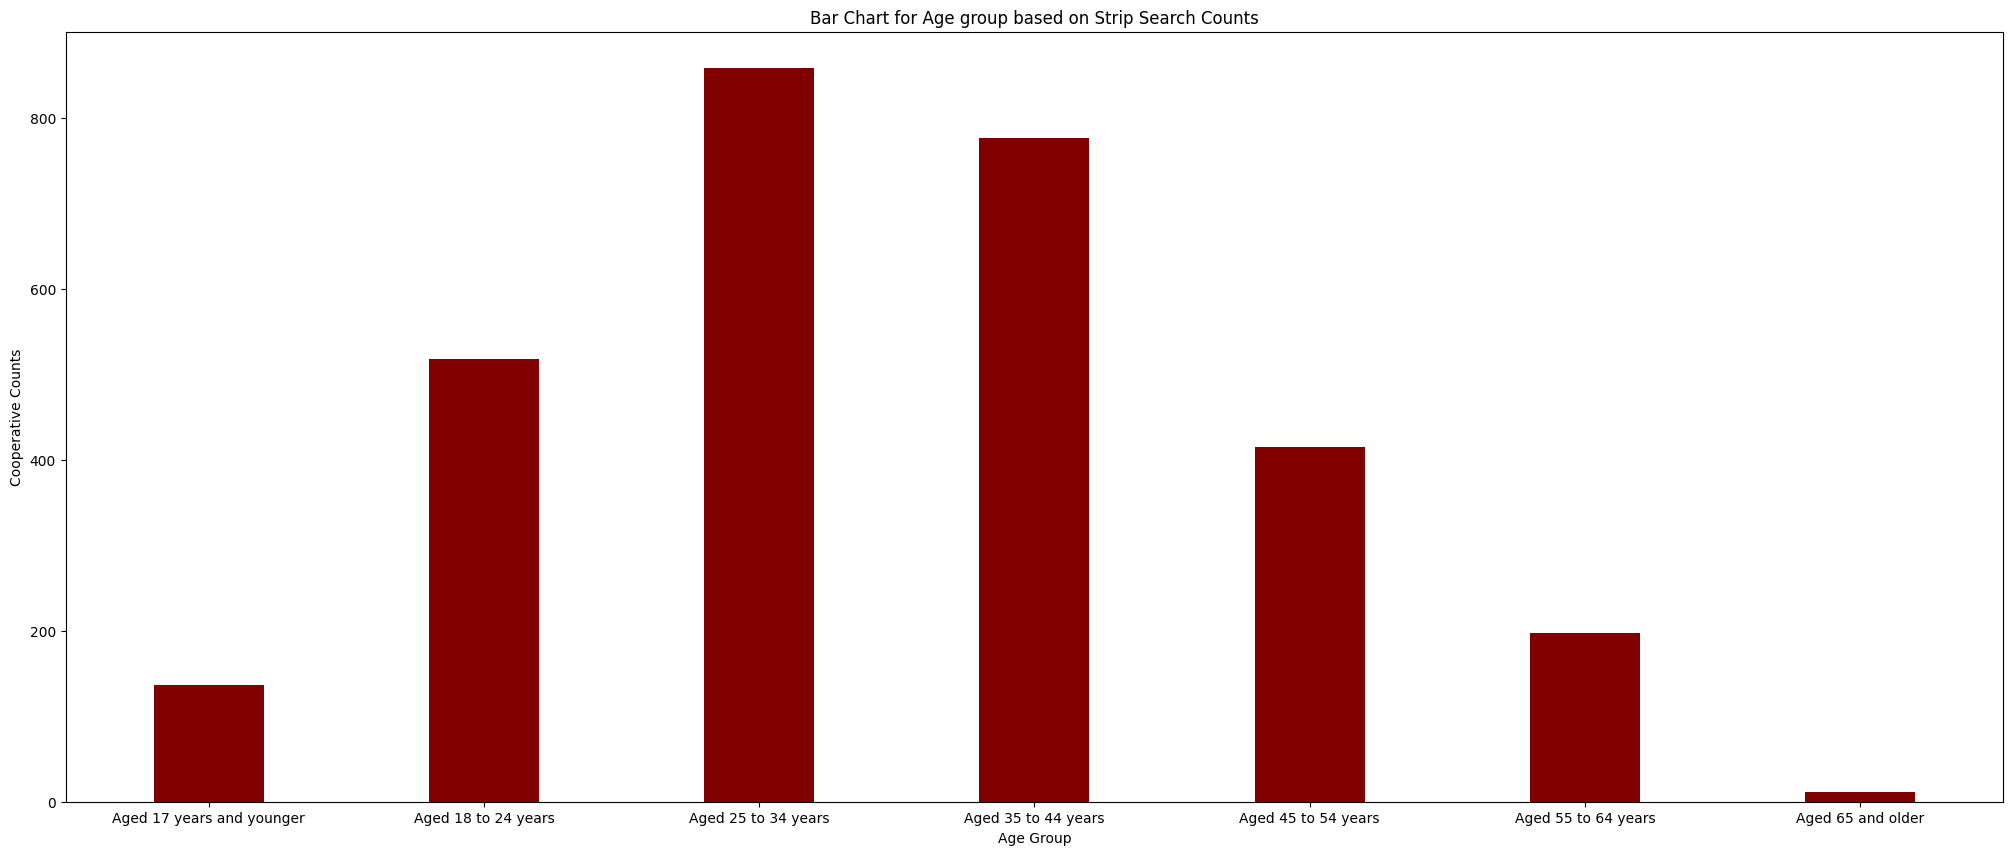

In [ ]:
# Bar chart for race and cooperative counts
fig = plt.figure(figsize = (25, 10))
# set up title and label
plt.bar(data1['Age_group__at_arrest_'], data1['StripSearch_counts'], 
        color ='maroon',
        width = 0.4)
plt.xlabel("Age Group")
plt.ylabel("Cooperative Counts")
plt.title("Bar Chart for Age group based on Strip Search Counts")
plt.show()

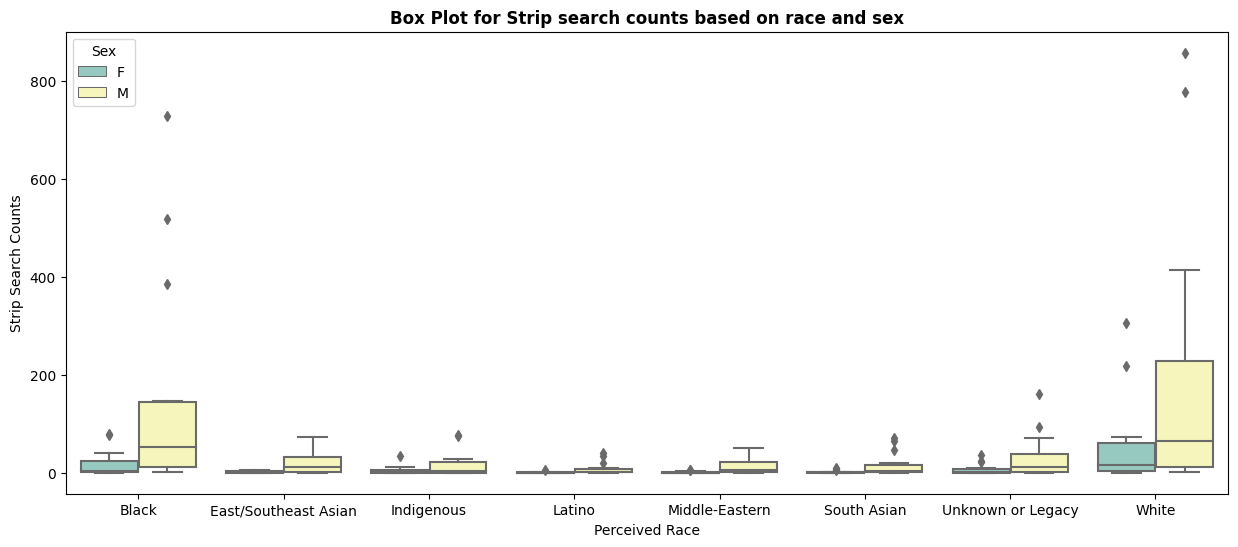

In [ ]:
# Boxplot for cooperative counts based on sex and race
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="Perceived_Race", y='StripSearch_counts', 
            hue="Sex", data= data1, palette="Set3", ax = ax)
# Set up title and label
plt.title('Box Plot for Strip search counts based on race and sex', 
          fontweight='bold')
plt.xlabel("Perceived Race")
plt.ylabel("Strip Search Counts")
plt.show()

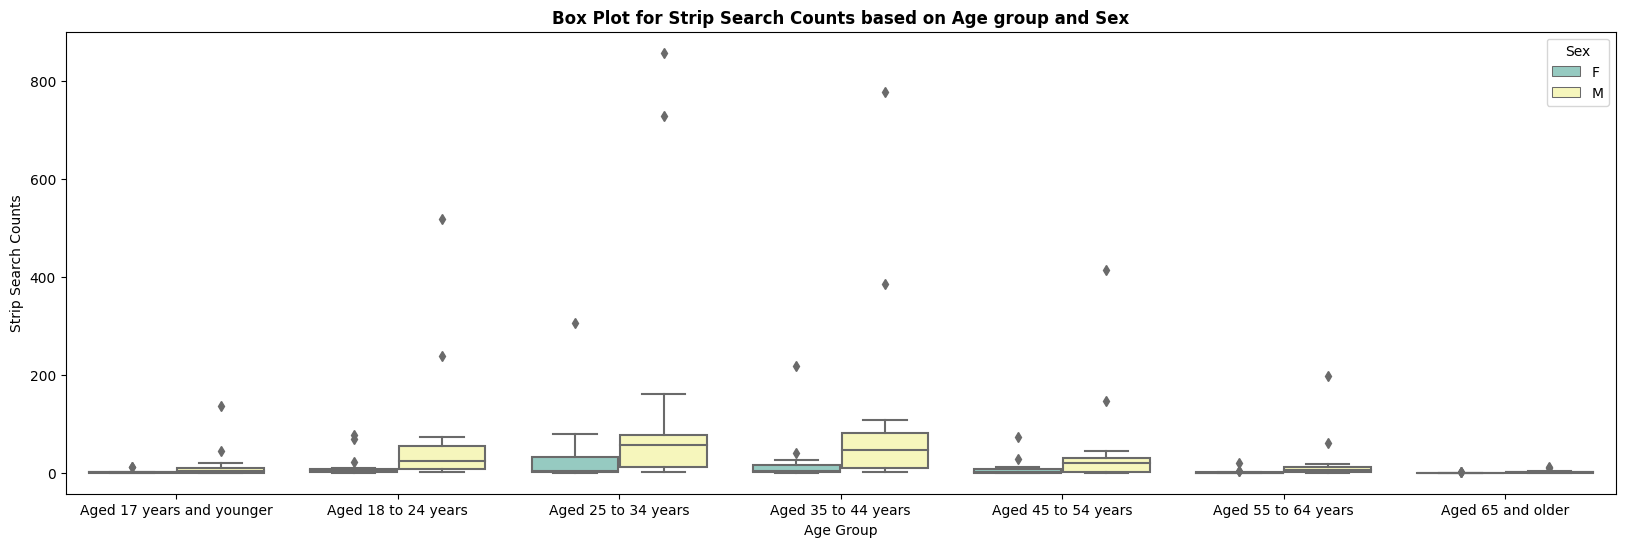

In [ ]:
# Boxplot for Strip search counts based on sex and race
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x="Age_group__at_arrest_", y='StripSearch_counts', 
            hue="Sex", data = data1, palette="Set3", ax = ax)
# Set up title and label
plt.title('Box Plot for Strip Search Counts based on Age group and Sex', 
          fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Strip Search Counts")
plt.show()

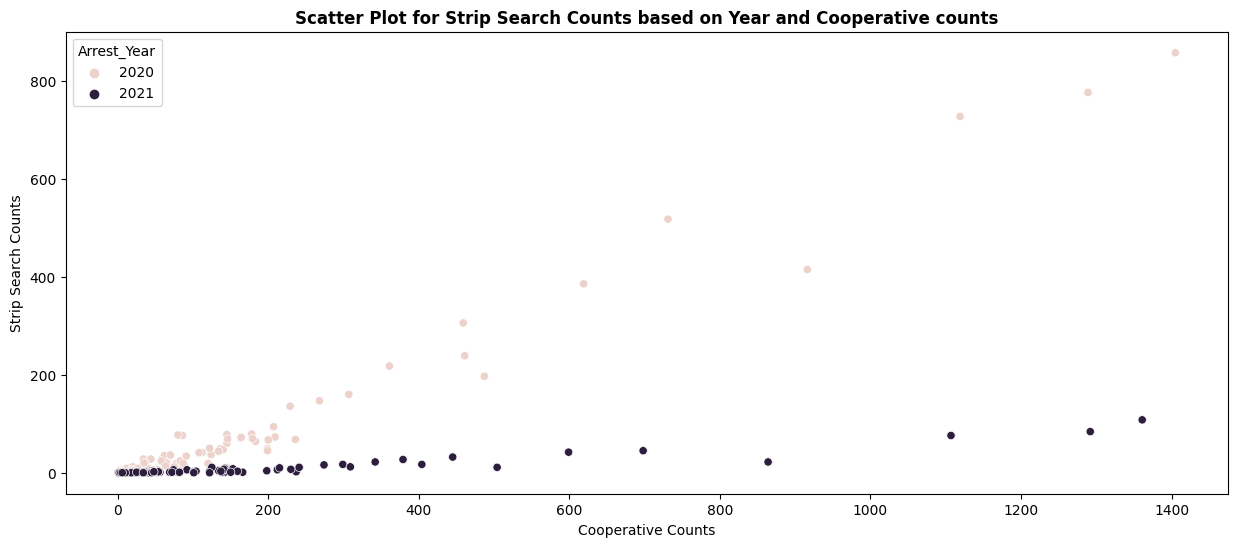

In [ ]:
# Sactter Plot for Strip search counts based on arrest year and cooperative counts
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data= data1, x='Cooperative_counts', y = 'StripSearch_counts', hue= 'Arrest_Year')
# Set up title and label
plt.title('Scatter Plot for Strip Search Counts based on Year and Cooperative counts', 
          fontweight='bold')
plt.xlabel("Cooperative Counts")
plt.ylabel("Strip Search Counts")
plt.show()

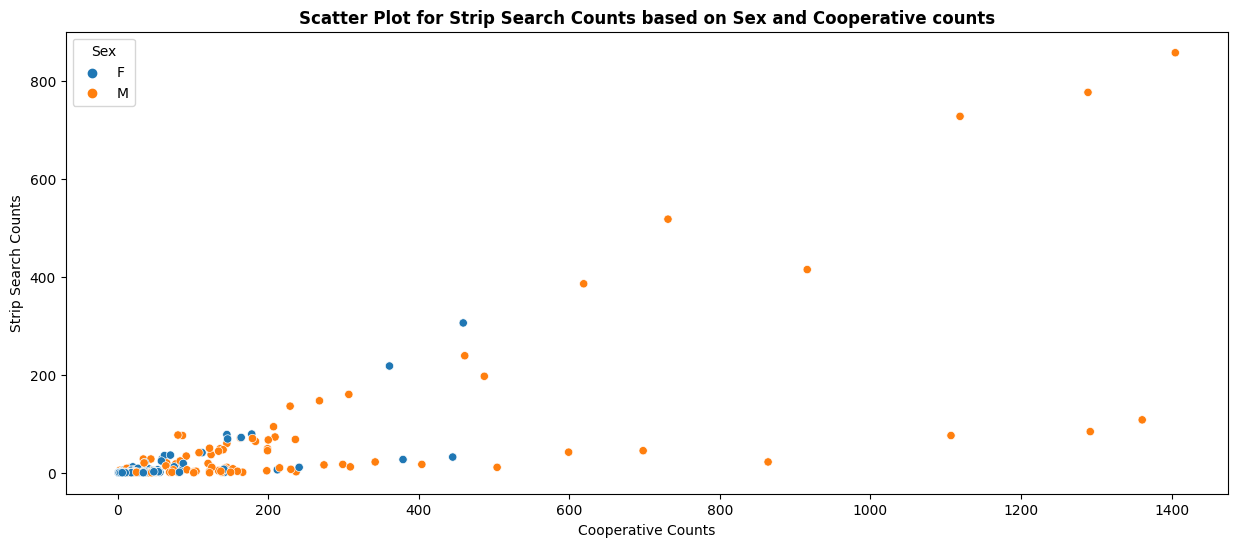

In [ ]:
# Sactter Plot for Strip search counts based on sex and cooperative counts
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data= data1, x='Cooperative_counts', y = 'StripSearch_counts', hue= 'Sex')
# Set up title and label
plt.title('Scatter Plot for Strip Search Counts based on Sex and Cooperative counts', 
          fontweight='bold')
plt.xlabel("Cooperative Counts")
plt.ylabel("Strip Search Counts")
plt.show()

In [ ]:
# summary statistics by sex based on strip search counts and cooperative counts
data1[['StripSearch_counts','Cooperative_counts', 'Sex']].groupby('Sex').describe()

StripSearch_counts                                                      \
                 count       mean         std  min   25%  50%   75%    max   
Sex                                                                          
F                111.0  11.558559   37.903870  0.0  0.00  1.0   5.5  306.0   
M                112.0  58.187500  145.431358  0.0  1.75  9.0  45.5  858.0   

    Cooperative_counts                                                   \
                 count        mean         std  min   25%    50%    75%   
Sex                                                                       
F                111.0   48.891892   84.537603  1.0   6.5   19.0   46.0   
M                112.0  211.348214  307.925190  2.0  35.0  114.0  207.5   

             
        max  
Sex          
F     459.0  
M    1405.0

In [ ]:
# summary statistics by race based on strip search counts and cooperative counts
data1[['StripSearch_counts','Cooperative_counts','Perceived_Race']].groupby('Perceived_Race').describe()

StripSearch_counts                                      \
                                  count        mean         std  min    25%   
Perceived_Race                                                                
Black                              28.0   86.928571  172.625033  0.0   2.75   
East/Southeast Asian               28.0   12.178571   21.746100  0.0   0.00   
Indigenous                         28.0   10.928571   20.714870  0.0   0.00   
Latino                             27.0    4.888889   10.319263  0.0   0.00   
Middle-Eastern                     28.0    8.142857   15.390508  0.0   0.00   
South Asian                        28.0    9.178571   18.826800  0.0   0.00   
Unknown or Legacy                  28.0   19.142857   35.757117  0.0   0.75   
White                              28.0  127.357143  221.877880  0.0  10.00   

                                          Cooperative_counts              \
                       50%     75%    max              count        mean   
Perceived_Race                                                             
Black                 16.5   76.50  728.0               28.0  266.571429   
East/Southeast Asian   2.5   10.75   73.0               28.0   81.000000   
Indigenous             3.0    7.00   77.0               28.0   27.214286   
Latino                 1.0    3.50   41.0               27.0   33.185185   
Middle-Eastern         2.0    5.25   50.0               28.0   54.071429   
South Asian            1.0    7.25   70.0               28.0   59.535714   
Unknown or Legacy      2.0   20.25  160.0               28.0   79.214286   
White                 24.5  130.25  858.0               28.0  439.607143   

                                                                       
                             std   min     25%    50%     75%     max  
Perceived_Race                                                         
Black                 318.612551   3.0   48.25  145.0  286.50  1119.0  
East/Southeast Asian   86.922273   4.0   25.75   35.5  127.50   299.0  
Indigenous             28.806323   1.0    4.50   17.5   44.75    92.0  
Latino                 41.342879   1.0    5.50   15.0   43.00   166.0  
Middle-Eastern         65.570956   1.0   12.00   19.5   88.25   237.0  
South Asian            66.116890   2.0    9.00   30.5  105.75   230.0  
Unknown or Legacy      87.718978   2.0   22.50   40.5  122.75   309.0  
White                 436.046408  33.0  140.00  301.0  491.25  1405.0

In [ ]:
# summary statistics by year based on cooperative counts
data1[['StripSearch_counts','Cooperative_counts','Arrest_Year']].groupby('Arrest_Year').describe()

StripSearch_counts                                              \
                         count      mean         std  min  25%   50%   75%   
Arrest_Year                                                                  
2020                     111.0  64.09009  148.042472  0.0  2.0  11.0  49.5   
2021                     112.0   6.12500   16.106137  0.0  0.0   1.0   4.0   

                   Cooperative_counts                                     \
               max              count        mean         std  min   25%   
Arrest_Year                                                                
2020         858.0              111.0  130.954955  242.782521  1.0  15.5   
2021         108.0              112.0  130.017857  238.207003  1.0  14.0   

                                   
              50%     75%     max  
Arrest_Year                        
2020         37.0  142.50  1405.0  
2021         42.0  138.75  1361.0

In [ ]:
# summary statistics by age group based on cooperative counts
data1[['StripSearch_counts','Cooperative_counts','Age_group__at_arrest_']].groupby('Age_group__at_arrest_').describe()

StripSearch_counts                              \
                                       count       mean         std  min   
Age_group__at_arrest_                                                      
Aged 17 years and younger               32.0   8.750000   24.866093  0.0   
Aged 18 to 24 years                     32.0  42.156250   98.163165  0.0   
Aged 25 to 34 years                     32.0  86.593750  195.706802  0.0   
Aged 35 to 44 years                     32.0  65.531250  151.117767  0.0   
Aged 45 to 54 years                     32.0  28.281250   76.305935  0.0   
Aged 55 to 64 years                     31.0  11.677419   36.220977  0.0   
Aged 65 and older                       32.0   1.125000    2.485441  0.0   

                                                    Cooperative_counts  \
                            25%   50%    75%    max              count   
Age_group__at_arrest_                                                    
Aged 17 years and younger  0.00   1.0   7.50  136.0               32.0   
Aged 18 to 24 years        2.75   8.5  43.25  518.0               32.0   
Aged 25 to 34 years        3.50  14.5  70.00  858.0               32.0   
Aged 35 to 44 years        2.00  11.0  53.50  777.0               32.0   
Aged 45 to 54 years        0.75   3.0  22.50  415.0               32.0   
Aged 55 to 64 years        0.00   2.0   5.00  197.0               31.0   
Aged 65 and older          0.00   0.0   1.00   11.0               32.0   

                                                                               \
                                 mean         std   min    25%    50%     75%   
Age_group__at_arrest_                                                           
Aged 17 years and younger   44.250000   62.160562   2.0   4.00   19.5   45.75   
Aged 18 to 24 years        138.062500  173.715366   7.0  27.50   95.5  145.25   
Aged 25 to 34 years        285.343750  384.899954  18.0  52.25  172.0  301.00   
Aged 35 to 44 years        225.468750  331.877454  12.0  36.75  106.5  209.00   
Aged 45 to 54 years        130.781250  215.424223   5.0  20.25   50.0  126.50   
Aged 55 to 64 years         67.354839  120.656413   1.0   9.50   19.0   74.50   
Aged 65 and older           20.156250   33.895579   1.0   3.00    6.0   26.00   

                                   
                              max  
Age_group__at_arrest_              
Aged 17 years and younger   229.0  
Aged 18 to 24 years         731.0  
Aged 25 to 34 years        1405.0  
Aged 35 to 44 years        1361.0  
Aged 45 to 54 years         916.0  
Aged 55 to 64 years         504.0  
Aged 65 and older           145.0

In [ ]:
# Power analysis
# Year, Cooperative Counts, Strip Search Counts
# Split sub-data
data1_2020 = data1[data1['Arrest_Year']==2020]
data1_2021 = data1[data1['Arrest_Year']==2021]
strip_2020 = data1_2020['StripSearch_counts']
strip_2021 = data1_2021['StripSearch_counts']

mdata1 = data1[data1['Sex']=='M']
fdata2 = data1[data1['Sex']=='F']
strip_m = mdata1['StripSearch_counts']
strip_f = fdata2['StripSearch_counts']

In [ ]:
#Cohen's D 
#Functions Calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# Function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
# Conduct power analysis to get effect size for year
effect_size_year = Cohens_d(strip_2020,strip_2021)
alpha = 0.05
power = 0.8
ratio_year =len(strip_2020)/len(strip_2021) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Year:', effect_size_year)

Effect size (Cohen's D) for Year: 0.5516984902106596


In [ ]:
# Print out the sample size and actual size for year 2020 and 2021
analysis = TTestIndPower()
sample_size_year = analysis.solve_power(effect_size_year, power=power, nobs1=None, ratio=ratio_year, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size_year, 'needed for year 2021') 
print('Actual size of year 2021:', len(strip_2021))
nobs2 =ratio_year*sample_size_year
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for year 2020')
print('Actual size of year 2020:', len(strip_2020))

Sample Size of nobs1: 52.789 needed for year 2021
Actual size of year 2021: 112
Sample Size of nobs2: 52.317 needed for year 2020
Actual size of year 2020: 111


In [ ]:
# Conduct power analysis to get effect size for sex
effect_size_sex = Cohens_d(strip_m,strip_f)
alpha = 0.05
power = 0.8
ratio_sex =len(strip_m)/len(strip_f) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Sex:',effect_size_sex)

Effect size (Cohen's D) for Sex: 0.43791070240506513


In [ ]:
# Print out the sample size and actual size for sex
analysis = TTestIndPower()
sample_size_sex = analysis.solve_power(effect_size_sex, power=power, nobs1=None, ratio=ratio_sex, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size_sex, 'needed for female') 
print('Actual size of female for strip search:', len(strip_f))
nobs2 =ratio_sex*sample_size_sex
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for male')
print('Actual size of male for strip search:', len(strip_m))

Sample Size of nobs1: 82.460 needed for female
Actual size of female for strip search: 111
Sample Size of nobs2: 83.203 needed for male
Actual size of male for strip search: 112


In [ ]:
# Split race into white and non-white(Colored people)
data1_white = data1[data1['Perceived_Race'] == 'White']
data1_color = data1[data1['Perceived_Race'] != 'White']

strip_white = data1_white['StripSearch_counts']
strip_color = data1_color['StripSearch_counts']

In [ ]:
# Conduct power analysis to get effect size for sex
effect_size_race = Cohens_d(strip_white,strip_color)
alpha = 0.05
power = 0.8
ratio_race =len(strip_white)/len(strip_color) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Race:',effect_size_race)

Effect size (Cohen's D) for Race: 1.0236928386557649


In [ ]:
# Print out the sample size and actual size for sex
analysis = TTestIndPower()
sample_size_race = analysis.solve_power(effect_size_race, power=power, nobs1=None, ratio=ratio_race, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size_race, 'needed for white race') 
print('Actual size of non-white:', len(strip_color))
nobs2 =ratio_race*sample_size_race
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for non-white race')
print('Actual size of white:', len(strip_white))

Sample Size of nobs1: 61.376 needed for white race
Actual size of non-white: 195
Sample Size of nobs2: 8.813 needed for non-white race
Actual size of white: 28


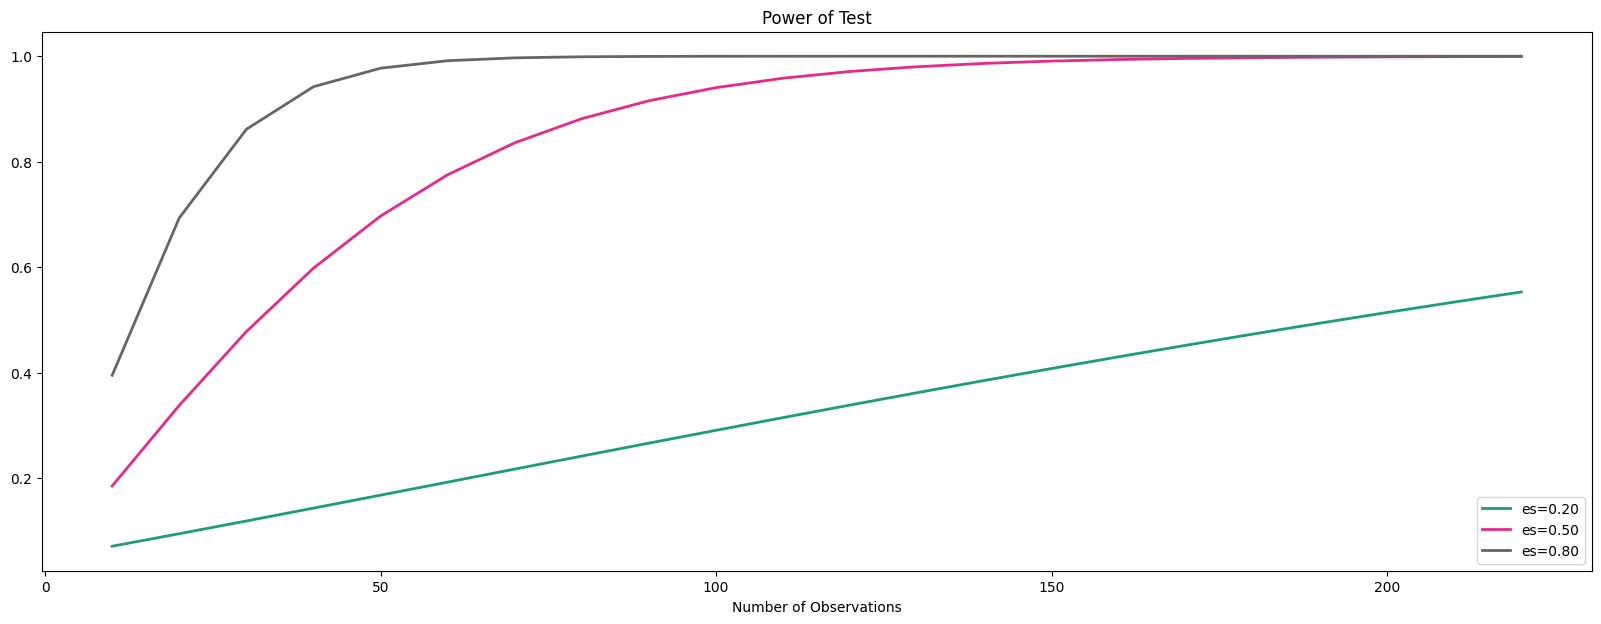

In [ ]:
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(10,223,10))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

In [ ]:
# T-test
# T test to see if there is gender differences
# Define male and female group
female_data = data1[data1['Sex'] == 'F']
male_data = data1[data1['Sex'] == 'M']
ttest_ind(female_data['StripSearch_counts'], male_data['StripSearch_counts'])

Ttest_indResult(statistic=-3.2696677864651726, pvalue=0.001248811024496086)

In [ ]:
# T test to define the year differences
# Split into year 2020 and 2021
year_2020 = data1[data1['Arrest_Year'] == 2020]
year_2021 = data1[data1['Arrest_Year'] == 2021]
ttest_ind(year_2020['StripSearch_counts'], year_2021['StripSearch_counts'])

Ttest_indResult(statistic=4.119266259938754, pvalue=5.372955067780954e-05)

In [ ]:
# ANCOVA
# ANCOVA for controlling factor year
ancova(data=data1, dv='StripSearch_counts', covar='Cooperative_counts', between='Arrest_Year')

,Source,SS,DF,F,p-unc,np2
0,Arrest_Year,1.852829e+05,1,40.931040,9.358064e-10,0.156865
1,Cooperative_counts,1.443741e+06,1,318.938391,1.096488e-44,0.591790
2,Residual,9.958760e+05,220,NaN,NaN,NaN


In [ ]:
# ANCOVA for controlling factor gender
ancova(data=data1, dv='StripSearch_counts', covar='Cooperative_counts', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,4.039681e+03,1,0.755004,3.858435e-01,0.003420
1,Cooperative_counts,1.328599e+06,1,248.311139,5.942773e-38,0.530227
2,Residual,1.177119e+06,220,NaN,NaN,NaN


In [ ]:
# ANCOVA for controlling factor race
ancova(data=data1, dv='StripSearch_counts', covar='Cooperative_counts', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,1.067258e+04,7,0.278753,9.617509e-01,0.009036
1,Cooperative_counts,1.040912e+06,1,190.309840,2.155075e-31,0.470703
2,Residual,1.170486e+06,214,NaN,NaN,NaN


In [ ]:
# ANCOVA for controlling factor age
ancova(data=data1, dv='StripSearch_counts', covar='Cooperative_counts', between= 'Age_group__at_arrest_')

,Source,SS,DF,F,p-unc,np2
0,Age_group__at_arrest_,2.988877e+03,6,0.090905,9.971788e-01,0.002530
1,Cooperative_counts,1.255035e+06,1,229.026734,1.041771e-35,0.515795
2,Residual,1.178170e+06,215,NaN,NaN,NaN


In [ ]:
# Logistic regression
# copy the original dataset
log_data = data.copy()
log_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# Drop the unisex data 
log_data = log_data[log_data['Sex'] != 'U']
# Replace similar description into same senetences
log_data['Age_group__at_arrest_'] = log_data[
    'Age_group__at_arrest_'].replace(['Aged 17 years and under'], 'Aged 17 years and younger')
log_data['Age_group__at_arrest_'] = log_data[
    'Age_group__at_arrest_'].replace(['Aged 65 years and older'], 'Aged 65 and older')
log_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# Split data based on independent variables and dependent variables
x = log_data[['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
              'ArrestLocDiv','Booked', 
              'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
              'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o']]

y = log_data['Actions_at_arrest___Cooperative']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
arrest_month = pd.get_dummies(x["Arrest_Month"], drop_first = True)
race = pd.get_dummies(x["Perceived_Race"], drop_first = True)
sex = pd.get_dummies(x["Sex"], drop_first = True)
age = pd.get_dummies(x["Age_group__at_arrest_"], drop_first = True)
x = pd.concat([x, arrest_month, race, sex, age], axis=1)
x.drop(['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'], axis = 1, inplace = True)
# Convert null value to 0
x = x.replace(np.nan,0)
x = x.replace('XX', 99)
x['ArrestLocDiv'] = x['ArrestLocDiv'].astype(int)
x.head()

,Arrest_Year,ArrestLocDiv,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Jan-Mar,July-Sept,Oct-Dec,East/Southeast Asian,Indigenous,Latino,Middle-Eastern,South Asian,Unknown or Legacy,White,M,Aged 18 to 24 years,Aged 25 to 34 years,Aged 35 to 44 years,Aged 45 to 54 years,Aged 55 to 64 years,Aged 65 and older
0,2020,54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,2020,54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2020,54,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,2021,99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,2021,99,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
#Check the type of x
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65267 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Arrest_Year                      65267 non-null  int64
 1   ArrestLocDiv                     65267 non-null  int64
 2   Booked                           65267 non-null  int64
 3   Actions_at_arrest___Concealed_i  65267 non-null  int64
 4   Actions_at_arrest___Combative__  65267 non-null  int64
 5   Actions_at_arrest___Resisted__d  65267 non-null  int64
 6   Actions_at_arrest___Mental_inst  65267 non-null  int64
 7   Actions_at_arrest___Assaulted_o  65267 non-null  int64
 8   Jan-Mar                          65267 non-null  uint8
 9   July-Sept                        65267 non-null  uint8
 10  Oct-Dec                          65267 non-null  uint8
 11  East/Southeast Asian             65267 non-null  uint8
 12  Indigenous                       65267 non-nul

In [ ]:
# Check the y type
y.unique()

array([1, 0])

In [ ]:
x.columns = x.columns.str.replace(' ', '_')
x.columns = x.columns.str.replace('-', '_')
x.columns = x.columns.str.replace('/', '_')
x.columns = x.columns.str.replace('(', '')
x.columns = x.columns.str.replace(')', '')
x.columns = x.columns.str.replace('_', '')

In [ ]:
# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 12345, stratify=y)

In [ ]:
# Show the y train results
y_train

37609    1
65268    0
61189    0
13825    0
15821    0
        ..
20980    1
22636    1
41490    0
45902    1
37001    0
Name: Actions_at_arrest___Cooperative, Length: 52213, dtype: int64

In [ ]:
import statsmodels.formula.api as smf
# Create the formula string 
all_columns = ' + '.join(x)
formula = "Actions_at_arrest___Cooperative ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:  Actions_at_arrest___Cooperative ~ ArrestYear + ArrestLocDiv + Booked + ActionsatarrestConcealedi + ActionsatarrestCombative + ActionsatarrestResistedd + ActionsatarrestMentalinst + ActionsatarrestAssaultedo + JanMar + JulySept + OctDec + EastSoutheastAsian + Indigenous + Latino + MiddleEastern + SouthAsian + UnknownorLegacy + White + M + Aged18to24years + Aged25to34years + Aged35to44years + Aged45to54years + Aged55to64years + Aged65andolder 

Optimization terminated successfully.
         Current function value: 0.647224
         Iterations 10


In [ ]:
# Statistical summary for logistic regression result
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     Actions_at_arrest___Cooperative   No. Observations:                52213
Model:                                       Logit   Df Residuals:                    52187
Method:                                        MLE   Df Model:                           25
Date:                             Fri, 14 Apr 2023   Pseudo R-squ.:                 0.05830
Time:                                     23:54:23   Log-Likelihood:                -33794.
converged:                                    True   LL-Null:                       -35886.
Covariance Type:                         nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   111.8707     36.952      3.027      0.002      39.446     184.295
ArrestYear                   -0.0555      0.018     -3.035      0.002      -0.091      -0.020
ArrestLocDiv                 -0.0002      0.000     -0.569      0.569      -0.001       0.000
Booked                        0.3620      0.022     16.156      0.000       0.318       0.406
ActionsatarrestConcealedi    -0.4104      0.170     -2.407      0.016      -0.745      -0.076
ActionsatarrestCombative     -3.0100      0.121    -24.796      0.000      -3.248      -2.772
ActionsatarrestResistedd     -2.6864      0.112    -23.889      0.000      -2.907      -2.466
ActionsatarrestMentalinst    -0.4553      0.062     -7.343      0.000      -0.577      -0.334
ActionsatarrestAssaultedo    -4.4944      1.005     -4.471      0.000      -6.465      -2.524
JanMar                        0.0876      0.026      3.390      0.001       0.037       0.138
JulySept                     -0.0041      0.026     -0.158      0.875      -0.055       0.047
OctDec                        0.0206      0.026      0.777      0.437      -0.031       0.072
EastSoutheastAsian            0.3346      0.039      8.540      0.000       0.258       0.411
Indigenous                   -0.0261      0.058     -0.454      0.650      -0.139       0.087
Latino                        0.3049      0.058      5.246      0.000       0.191       0.419
MiddleEastern                 0.1844      0.044      4.170      0.000       0.098       0.271
SouthAsian                    0.1543      0.042      3.647      0.000       0.071       0.237
UnknownorLegacy               0.0279      0.037      0.755      0.450      -0.045       0.100
White                         0.0740      0.023      3.202      0.001       0.029       0.119
M                             0.0290      0.023      1.243      0.214      -0.017       0.075
Aged18to24years              -0.1273      0.048     -2.680      0.007      -0.220      -0.034
Aged25to34years              -0.1199      0.045     -2.692      0.007      -0.207      -0.033
Aged35to44years              -0.0988      0.046     -2.169      0.030      -0.188      -0.010
Aged45to54years              -0.0358      0.048     -0.742      0.458      -0.131       0.059
Aged55to64years              -0.0667      0.054     -1.235      0.217      -0.173       0.039
Aged65andolder                0.0542      0.076      0.716      0.474      -0.094       0.203
=============================================================================================
"""

In [ ]:
#odds ratio 
np.exp(log_reg_1.params)

Intercept                    3.844335e+48
ArrestYear                   9.460020e-01
ArrestLocDiv                 9.998128e-01
Booked                       1.436222e+00
ActionsatarrestConcealedi    6.633988e-01
ActionsatarrestCombative     4.929108e-02
ActionsatarrestResistedd     6.812265e-02
ActionsatarrestMentalinst    6.342853e-01
ActionsatarrestAssaultedo    1.117172e-02
JanMar                       1.091561e+00
JulySept                     9.958949e-01
OctDec                       1.020766e+00
EastSoutheastAsian           1.397410e+00
Indigenous                   9.742011e-01
Latino                       1.356476e+00
MiddleEastern                1.202539e+00
SouthAsian                   1.166887e+00
UnknownorLegacy              1.028342e+00
White                        1.076771e+00
M                            1.029422e+00
Aged18to24years              8.804645e-01
Aged25to34years              8.870515e-01
Aged35to44years              9.059330e-01
Aged45to54years              9.647

In [ ]:
# result for odds ratio and confidence interval
params = log_reg_1.params
conf = log_reg_1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
CI_table = np.exp(conf)
CI_table

,Lower CI,Upper CI,OR
Intercept,1.352484e+17,1.092724e+80,3.844335e+48
ArrestYear,9.126931e-01,9.805265e-01,9.460020e-01
ArrestLocDiv,9.991678e-01,1.000458e+00,9.998128e-01
Booked,1.374512e+00,1.500703e+00,1.436222e+00
ActionsatarrestConcealedi,4.749580e-01,9.266039e-01,6.633988e-01
ActionsatarrestCombative,3.885439e-02,6.253118e-02,4.929108e-02
ActionsatarrestResistedd,5.464752e-02,8.492051e-02,6.812265e-02
ActionsatarrestMentalinst,5.617062e-01,7.162426e-01,6.342853e-01
ActionsatarrestAssaultedo,1.557763e-03,8.011955e-02,1.117172e-02
JanMar,1.037648e+00,1.148275e+00,1.091561e+00


In [ ]:
# Predict responses for test data
pred_test = log_reg_1.predict(x_test)
prediction_1 = list(map(round, pred_test))

In [ ]:
# Accuracy score for test data
print('\nTest accuracy for test data = ', accuracy_score(y_test, prediction_1))


Test accuracy for test data =  0.5809713497778459


In [ ]:
# Confusion matrix for test data
cm1 = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm1) 


Confusion Matrix : 
 [[4842 2391]
 [3079 2742]]


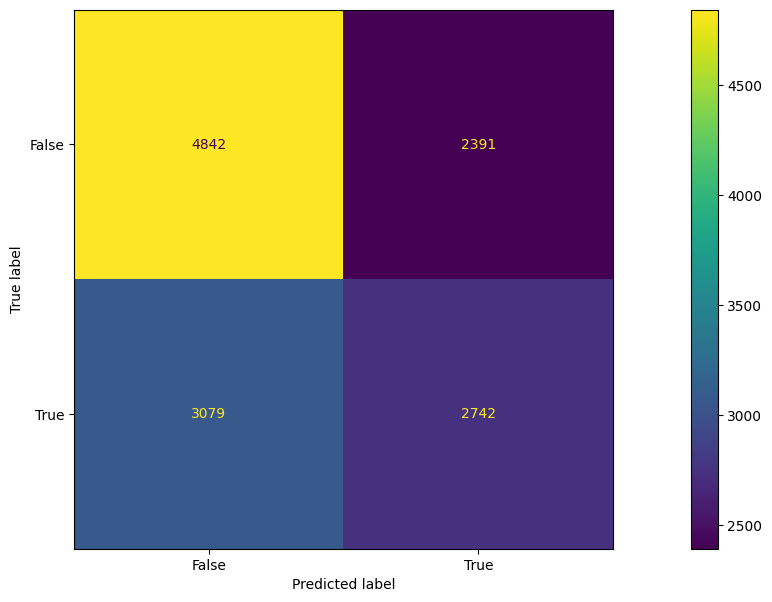

In [ ]:
# Visualization for confusion matrix for test data
from sklearn import metrics
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display1.plot()
plt.show()

In [ ]:
# Predict responses for train data
pred_train = log_reg_1.predict(x_train)
# rounds to nearest integer
prediction_2 = list(map(round, pred_train))

In [ ]:
# Accuracy score
print('\nTest accuracy for train data = ', accuracy_score(y_train, prediction_2))


Test accuracy for train data =  0.579798134564189


In [ ]:
# Confusion matrix for train data
cm2 = confusion_matrix(y_train, prediction_2) 
print ("\nConfusion Matrix : \n", cm2) 


Confusion Matrix : 
 [[19398  9530]
 [12410 10875]]


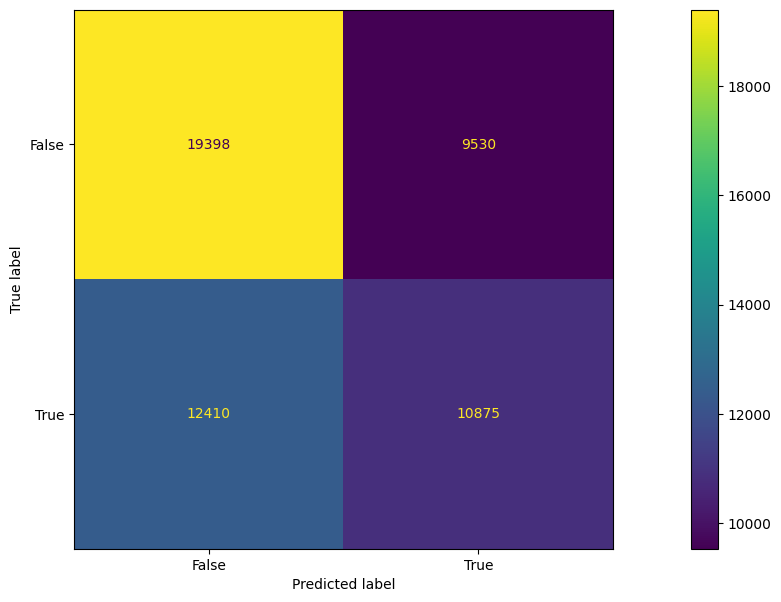

In [ ]:
# Visualization for confusion matrix for train data
from sklearn import metrics
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display2.plot()
plt.show()

In [ ]:
# Prediction interval for all variables based on formula
from scipy.stats import norm
coeff = log_reg_1.params.values
std_error = log_reg_1.bse.values
conf_level = 0.95
critical_val = norm.ppf((1 + conf_level) / 2)
mar = critical_val * std_error
upper_p_i = critical_val + mar
lower_p_i = critical_val - mar

In [ ]:
# Form into a table
pred_f = log_reg_1.conf_int()
pred_f.columns = ["Lower PI", "Upper PI"]
for i in range(len(coeff)):
  pred_f["Lower PI"][i] = np.exp(lower_p_i)[i]
  pred_f["Upper PI"][i] = np.exp(upper_p_i)[i]
pred_f

,Lower PI,Upper PI
Intercept,2.497539e-31,2.017859e+32
ArrestYear,6.849112e+00,7.358153e+00
ArrestLocDiv,7.094492e+00,7.103654e+00
Booked,6.794046e+00,7.417791e+00
ActionsatarrestConcealedi,5.082555e+00,9.915645e+00
ActionsatarrestCombative,5.595943e+00,9.005956e+00
ActionsatarrestResistedd,5.694826e+00,8.849579e+00
ActionsatarrestMentalinst,6.286748e+00,8.016357e+00
ActionsatarrestAssaultedo,9.898810e-01,5.091199e+01
JanMar,6.748444e+00,7.467916e+00


Optimization terminated successfully.
         Current function value: 0.687283
         Iterations 4


Text(0.5, 1.0, 'Prediction Interval for Race and Cooperative at Arrest')

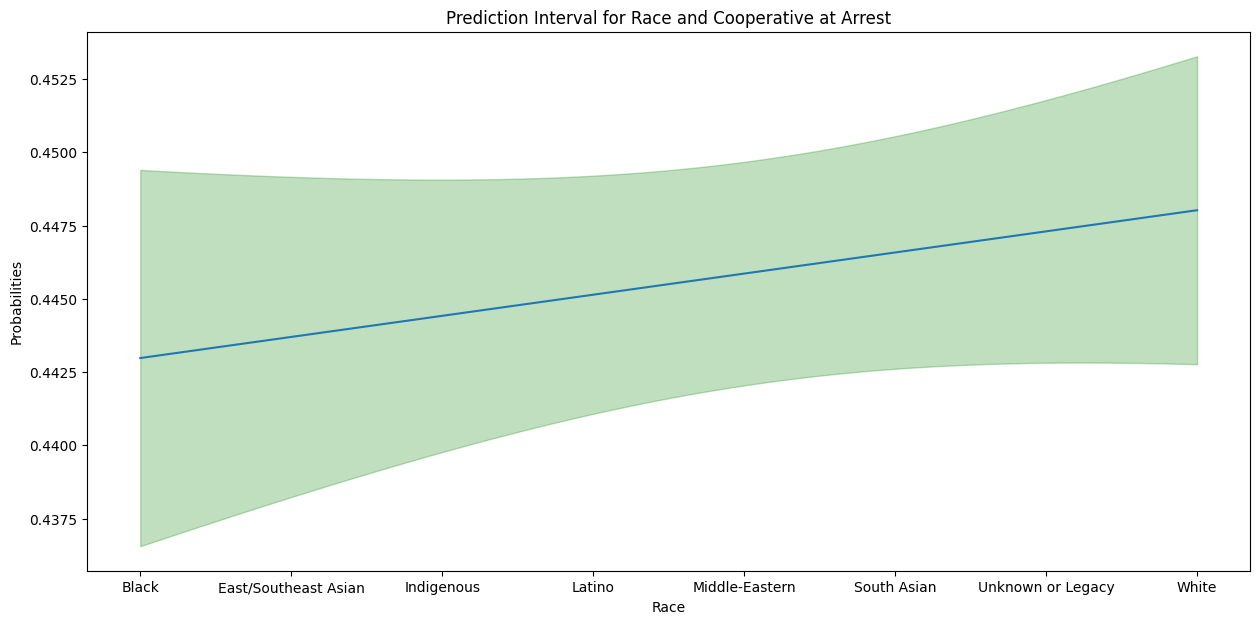

In [ ]:
# Prediction interval graph for race
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

pred  = data.copy()
pred_data = pred.dropna(subset=['Perceived_Race'])

label_encode = LabelEncoder()
pred_data['Perceived_Race'] = label_encode.fit_transform(pred_data["Perceived_Race"])

log_m = sm.Logit.from_formula('Actions_at_arrest___Cooperative ~ Perceived_Race', pred_data)
result = log_m.fit()
mer = result.get_margeff()

Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = result.params.values.reshape(-1, 1)
V_ = result.cov_params().values

def var_π(x, β, V_):
    prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x)
    return prob

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((500, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

xx = sm.add_constant(np.linspace(pred_data.Perceived_Race.min(), pred_data.Perceived_Race.max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

x = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White']
default_x_ticks = range(len(x))

plt.rcParams['figure.figsize'] = [15, 7]
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(), alpha=.25, color='g')
plt.xticks(default_x_ticks, x)
plt.xlabel('Race')
plt.ylabel('Probabilities')
plt.title('Prediction Interval for Race and Cooperative at Arrest')

Text(0.5, 1.0, 'Prediction Interval for Age at arrest and Cooperative at Arrest')

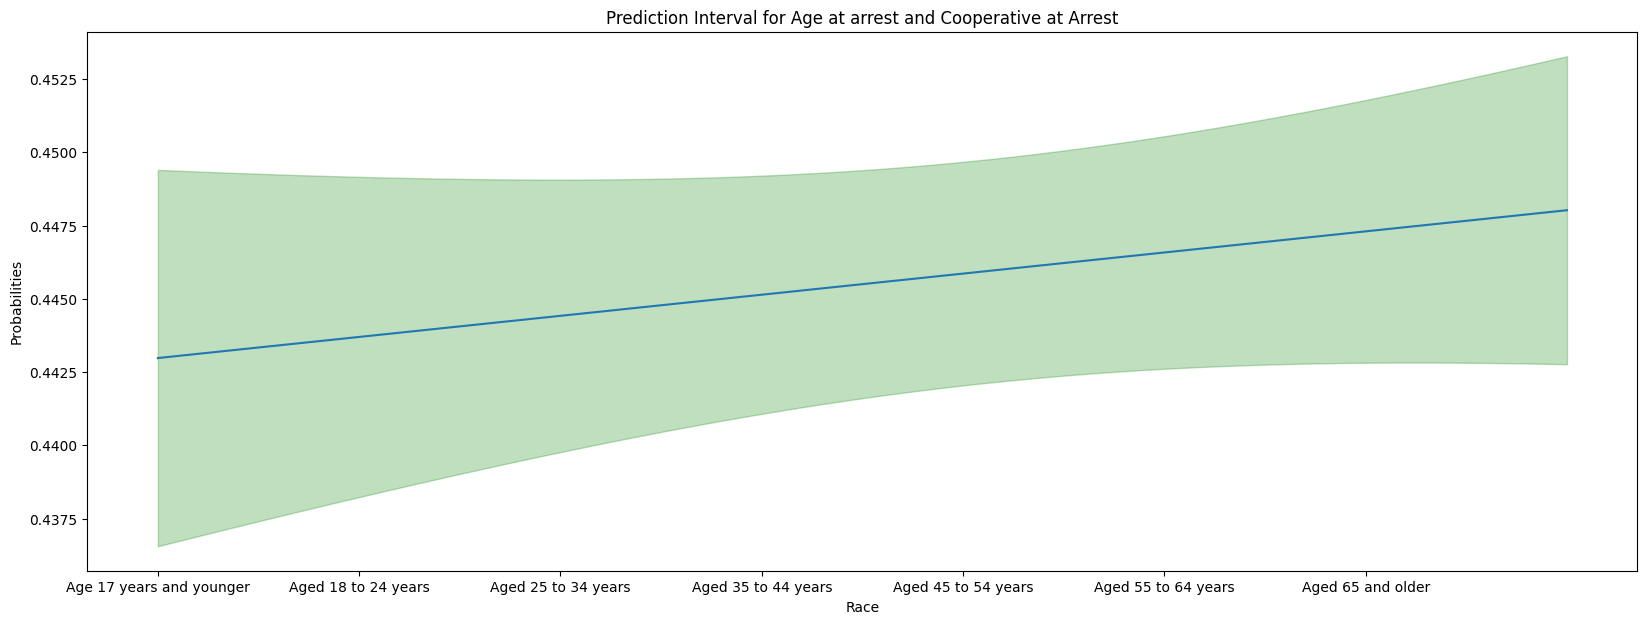

In [ ]:
x1 = ['Age 17 years and younger', 'Aged 18 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 44 years', 'Aged 45 to 54 years', 'Aged 55 to 64 years', 'Aged 65 and older']
default_x1_ticks = range(len(x1))

plt.rcParams['figure.figsize'] = [20, 7]
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(), alpha=.25, color='g')
plt.xticks(default_x1_ticks, x1)
plt.xlabel('Race')
plt.ylabel('Probabilities')
plt.title('Prediction Interval for Age at arrest and Cooperative at Arrest')